# 1. Selección y Registro en Kaggle
* Dataset: Top 50 Luxury Hotels Worldwide 2024.
* Registro en Kaggle

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as pio

In [4]:
hotels = pd.read_csv("data.csv", header="infer", sep=",", encoding="ISO-8859-1")
hotels.head()

,Rank,Name,Location,Overview,Total Rooms,Starting Rate in ($),Dining Area,Drinking Area,Hotel Ammenties,Address,Number
0,1,Capella Bangkok,Bangkok,A calming riverside oasis in the centre of cac...,101,600,Côte by Mauro Colagreco and Phra Nakhon,Stella,"Swimming pool(s), spa/wellness centre, fitnes...","300, 2 Charoen Krung Rd, Yan Nawa, Sathon, Ban...",+66 2 098 3888
1,2,Passalacqua,Lake Como,A sumptuous Lake Como retreat made for enjoyin...,24,1300,The Garden Terrace,Bar Terrace,"Spa/wellness centre, fitness centre, family f...","Via Besana, 59, 22010 Moltrasio CO, Italy",+39 031 44311
2,3,Rosewood Hong Kong,Hong Kong,Masterful minimalism meets marble-lined luxury,413,650,Bluhouse and The Dining Room,Darkside,"Swimming pool, spa/wellness centre, fitness c...","18 Salisbury Rd, Tsim Sha Tsui, Hong Kong",+852 3891 8888
3,4,Cheval Blanc,Paris,Uber-stylish riverside luxury and world-class ...,72,3000,Langosteria,Le Tout-Paris,"Swimming pool(s), spa/wellness centre, fitnes...","8 Quai du Louvre, 75001 Paris, France",+33 1 40 28 00 00
4,5,The Upper House,Hong Kong,A temple of Zen high above Hong Kong,117,650,Salisterra,NaN,"Swimming pool, fitness centre, family friendly","88 Queensway, Admiralty, Hong Kong",NaN


### Se observan las variables con las que cuenta esta base de datos

In [21]:
print(hotels.columns)

Index(['Rank', 'Name', 'Location', 'Overview', 'Total Rooms',
       'Starting Rate in ($)', 'Dining Area', 'Drinking Area',
       'Hotel Ammenties', 'Address', 'Number'],
      dtype='object')


## Revisión del dataset

In [22]:
# Se observan las estadisticas descriptivas
hotels.info()  
hotels.describe(include='all')  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  50 non-null     int64 
 1   Name                  50 non-null     object
 2   Location              50 non-null     object
 3   Overview              50 non-null     object
 4   Total Rooms           50 non-null     int64 
 5   Starting Rate in ($)  50 non-null     int64 
 6   Dining Area           50 non-null     object
 7   Drinking Area         46 non-null     object
 8   Hotel Ammenties       49 non-null     object
 9   Address               50 non-null     object
 10  Number                48 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


,Rank,Name,Location,Overview,Total Rooms,Starting Rate in ($),Dining Area,Drinking Area,Hotel Ammenties,Address,Number
count,50.00000,50,50,50,50.000000,50.000000,50,46,49,50,48
unique,NaN,50,37,50,NaN,NaN,50,46,37,50,48
top,NaN,Capella Bangkok,Bangkok,A calming riverside oasis in the centre of cac...,NaN,NaN,Côte by Mauro Colagreco and Phra Nakhon,Stella,"Swimming pool(s), spa/wellness centre, fitnes...","300, 2 Charoen Krung Rd, Yan Nawa, Sathon, Ban...",+66 2 098 3888
freq,NaN,1,4,1,NaN,NaN,1,1,7,1,1
mean,25.50000,NaN,NaN,NaN,134.620000,1377.340000,NaN,NaN,NaN,NaN,NaN
std,14.57738,NaN,NaN,NaN,129.328231,853.332904,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,12.000000,235.000000,NaN,NaN,NaN,NaN,NaN
25%,13.25000,NaN,NaN,NaN,52.250000,777.500000,NaN,NaN,NaN,NaN,NaN
50%,25.50000,NaN,NaN,NaN,104.000000,1200.000000,NaN,NaN,NaN,NaN,NaN
75%,37.75000,NaN,NaN,NaN,186.250000,1787.500000,NaN,NaN,NaN,NaN,NaN


In [23]:
missing_data = hotels.isnull().sum().sort_values(ascending=False)

# Análisis General del Dataset:


## Distribución de los precios de las tarifas de inicio de los 50 hoteles

Text(0, 0.5, 'Frecuencia')

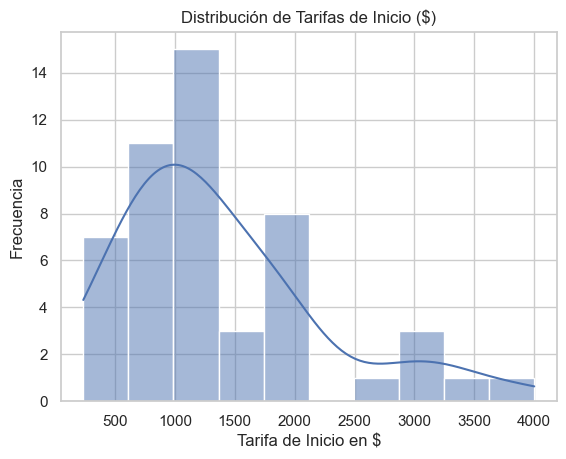

In [24]:
sns.histplot(hotels['Starting Rate in ($)'], bins=10, kde=True)
plt.title("Distribución de Tarifas de Inicio ($)")
plt.xlabel("Tarifa de Inicio en $")
plt.ylabel("Frecuencia")

## Distribución por ciudades de los 50 hoteles 

Text(0.5, 0, 'Número de Hoteles')

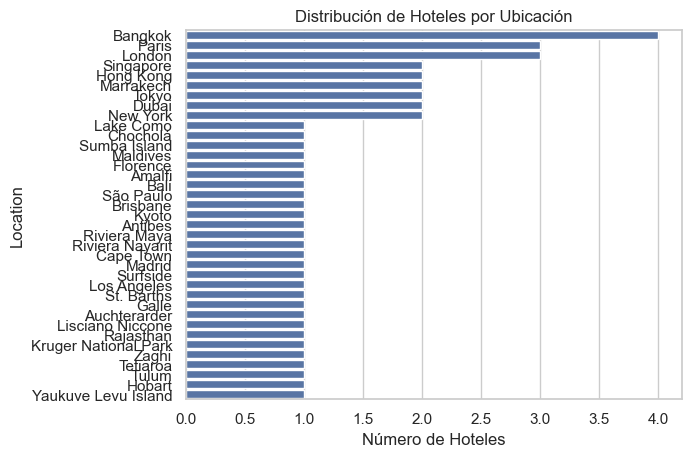

In [11]:
sns.countplot(data=hotels, y='Location', order=hotels['Location'].value_counts().index)
plt.title("Distribución de Hoteles por Ubicación")
plt.xlabel("Número de Hoteles")

## Distribución de los hoteles en el ranking

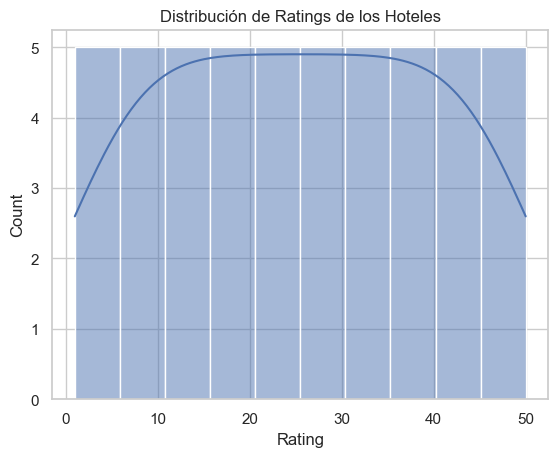

<Figure size 1000x600 with 0 Axes>

In [26]:
sns.histplot(hotels['Rank'], bins=10, kde=True)
plt.title("Distribución de Ratings de los Hoteles")
plt.xlabel("Rating")
plt.figure(figsize=(10, 6))
plt.show()


## Distribución de precios por cada país

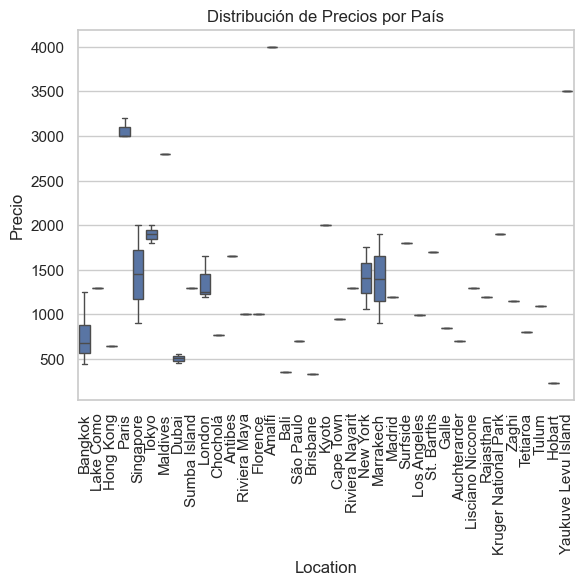

In [9]:
sns.boxplot(data=hotels, x="Location", y="Starting Rate in ($)")
plt.xticks(rotation=90)
plt.title("Distribución de Precios por País")
plt.ylabel("Precio")
plt.show()

## Nube de palabras más usadas en la descripción general

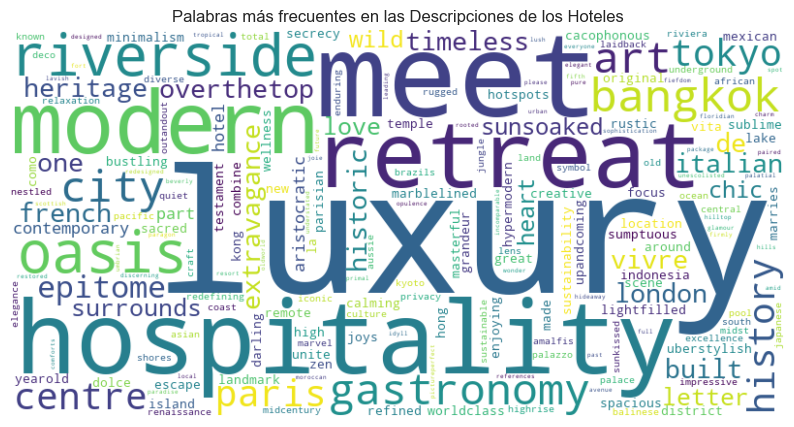

In [31]:
hotels['Overview'].isnull().sum()
hotels['Overview'] = hotels['Overview'].fillna('').str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(hotels['Overview'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en las Descripciones de los Hoteles')
plt.show()


## Relación entre la cantidad de habitaciones y el precio

Text(0, 0.5, 'Tarifa de Inicio en $')

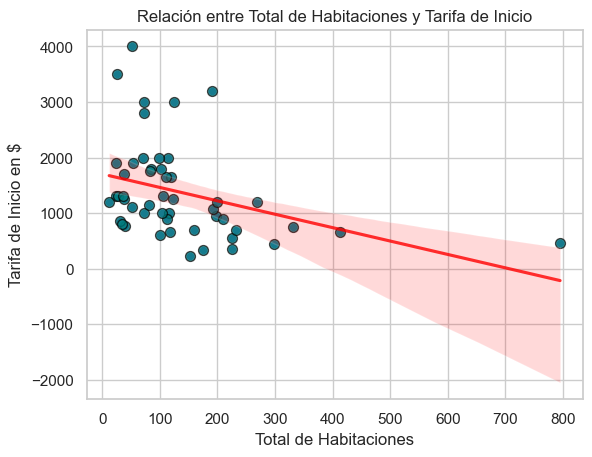

In [16]:
sns.scatterplot(data=hotels, x='Total Rooms', y='Starting Rate in ($)')
sns.regplot(data=hotels, x='Total Rooms', y='Starting Rate in ($)', color='teal', scatter_kws={'s': 50, 'alpha': 0.7, 'edgecolor': 'black'}, line_kws={"color": "red", "alpha": 0.8})
plt.title("Relación entre Total de Habitaciones y Tarifa de Inicio")
plt.xlabel("Total de Habitaciones")
plt.ylabel("Tarifa de Inicio en $")

## Relación entre el ranking y el precio del hotel

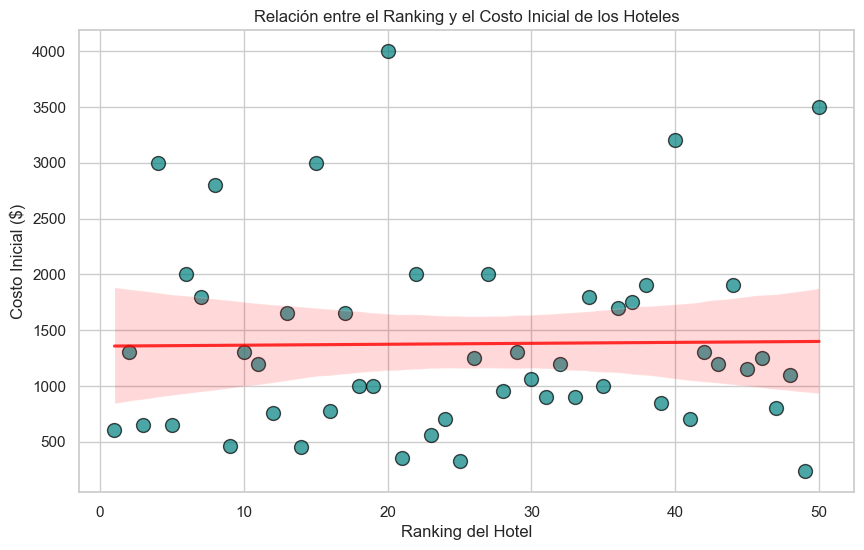

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(data=hotels, x='Rank', y='Starting Rate in ($)', color='teal', scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor': 'black'}, line_kws={"color": "red", "alpha": 0.8})

plt.title("Relación entre el Ranking y el Costo Inicial de los Hoteles")
plt.xlabel("Ranking del Hotel")
plt.ylabel("Costo Inicial ($)")
plt.show()


## Costo promedio del area de comedor de cada hotel

In [7]:
dining_area_count = hotels['Dining Area'].value_counts().reset_index()
dining_area_count.columns = ['Tipo de Área de Comedor', 'Frecuencia']

avg_rate_by_dining_area = hotels.groupby('Dining Area')['Starting Rate in ($)'].mean().reset_index()
avg_rate_by_dining_area.columns = ['Tipo de Área de Comedor', 'Costo Promedio ($)']

dining_area_table = pd.merge(dining_area_count, avg_rate_by_dining_area, on='Tipo de Área de Comedor')

pd.set_option('display.max_rows', None)  
dining_area_table

,Tipo de Área de Comedor,Frecuencia,Costo Promedio ($)
0,Côte by Mauro Colagreco and Phra Nakhon,1,600.0
1,The Garden Terrace,1,1300.0
2,Bluhouse and The Dining Room,1,650.0
3,Langosteria,1,3000.0
4,Salisterra,1,650.0
5,Butcher's Block,1,2000.0
6,Arva Restaurant,1,1800.0
7,"Once Upon a Table and So Hands On by Akira, a...",1,2800.0
8,Dinner by Heston Blumenthal and Jaleo by José...,1,460.0
9,Ombak,1,1300.0


C:\Users\Alejo\AppData\Local\Temp\ipykernel_11440\1270639510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotels, x='Dining Area', y='Starting Rate in ($)', palette="viridis")
C:\Users\Alejo\AppData\Local\Temp\ipykernel_11440\1270639510.py:9: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Alejo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


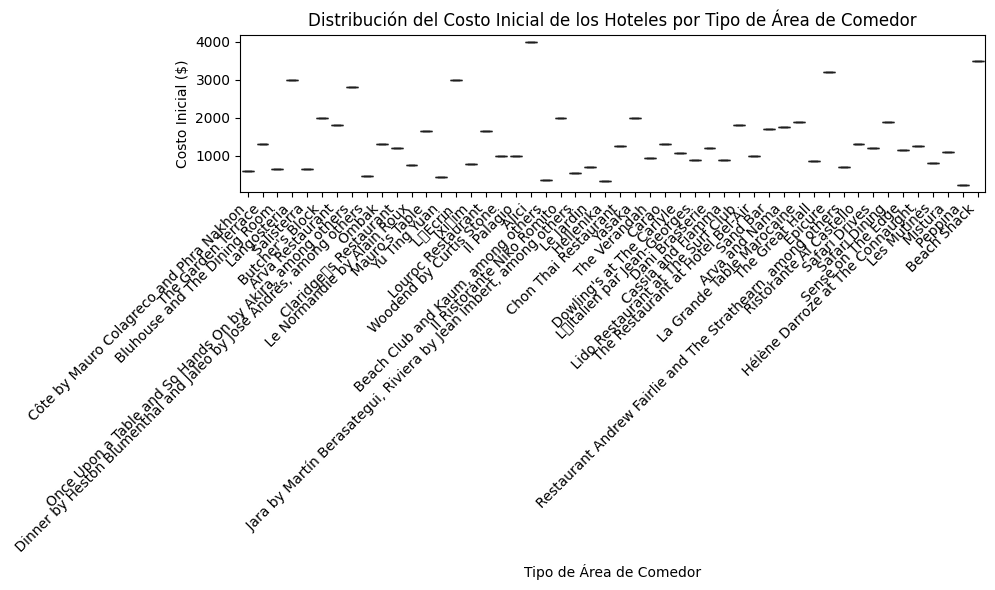

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotels, x='Dining Area', y='Starting Rate in ($)', palette="viridis")

plt.title("Distribución del Costo Inicial de los Hoteles por Tipo de Área de Comedor")
plt.xlabel("Tipo de Área de Comedor")
plt.ylabel("Costo Inicial ($)")

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


## Comodidades con las que cuentan los hoteles 

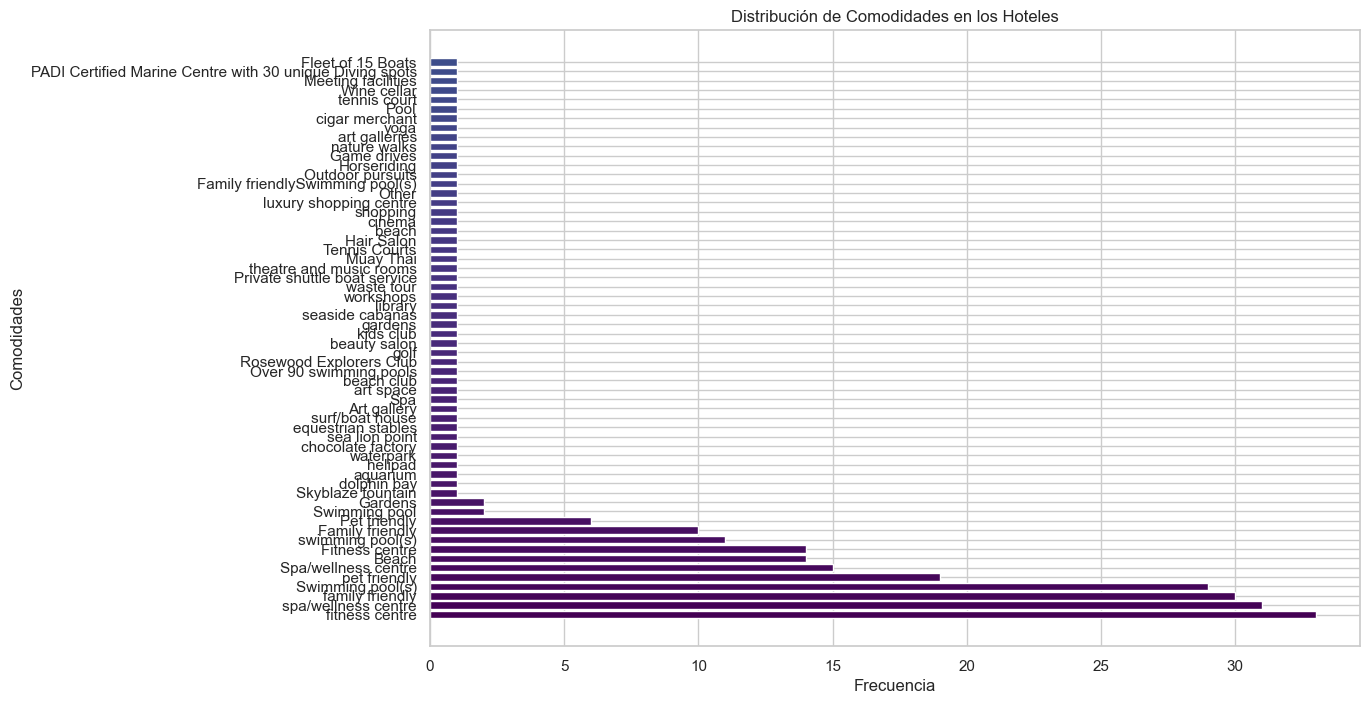

In [35]:
amenities = hotels['Hotel Ammenties'].str.split(',').explode().str.strip()
amenities = amenities[amenities != ''].value_counts()

plt.figure(figsize=(12, 8))
plt.barh(amenities.index, amenities.values, color=sns.color_palette("viridis", as_cmap=True).colors)

plt.xlabel("Frecuencia")
plt.ylabel("Comodidades")
plt.title("Distribución de Comodidades en los Hoteles")
plt.show()

## Servicios más recurrentes en los hoteles

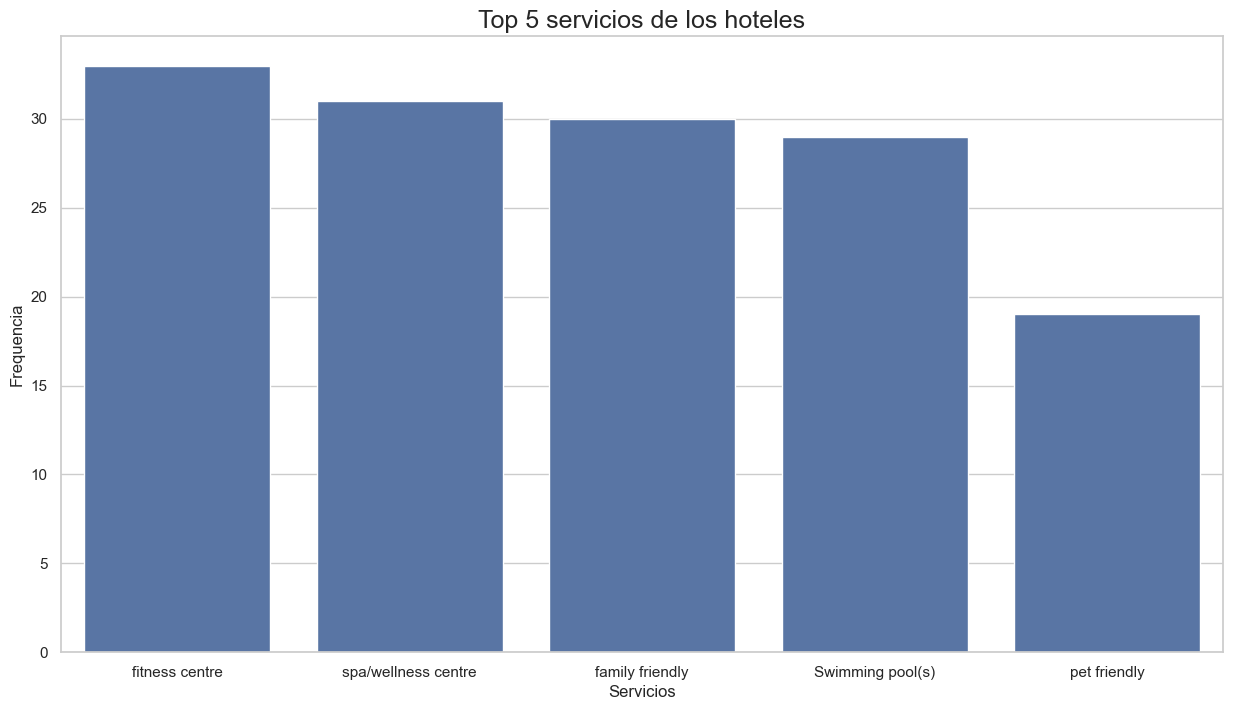

In [8]:
ammenities = hotels['Hotel Ammenties'].str.split(', ').explode().str.strip()
ammenties_count = ammenities.value_counts()

plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.barplot(x=ammenties_count.index[:5], y=ammenties_count.values[:5])
plt.title("Top 5 servicios de los hoteles",fontsize=18)
plt.xlabel("Servicios")
plt.ylabel("Frequencia")
plt.show()

## Correlación entre el rango del hotel, la cantidad de habitaciones y el precio

Text(0.5, 1.0, 'Matriz de Correlación entre Variables Numéricas')

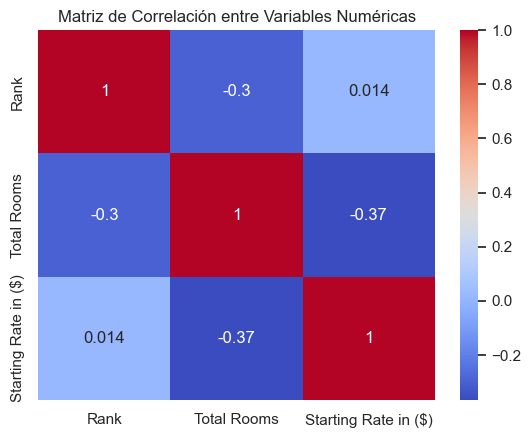

In [37]:
sns.heatmap(hotels[['Rank', 'Total Rooms', 'Starting Rate in ($)']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")


## Promedio de habitaciones por ubicación

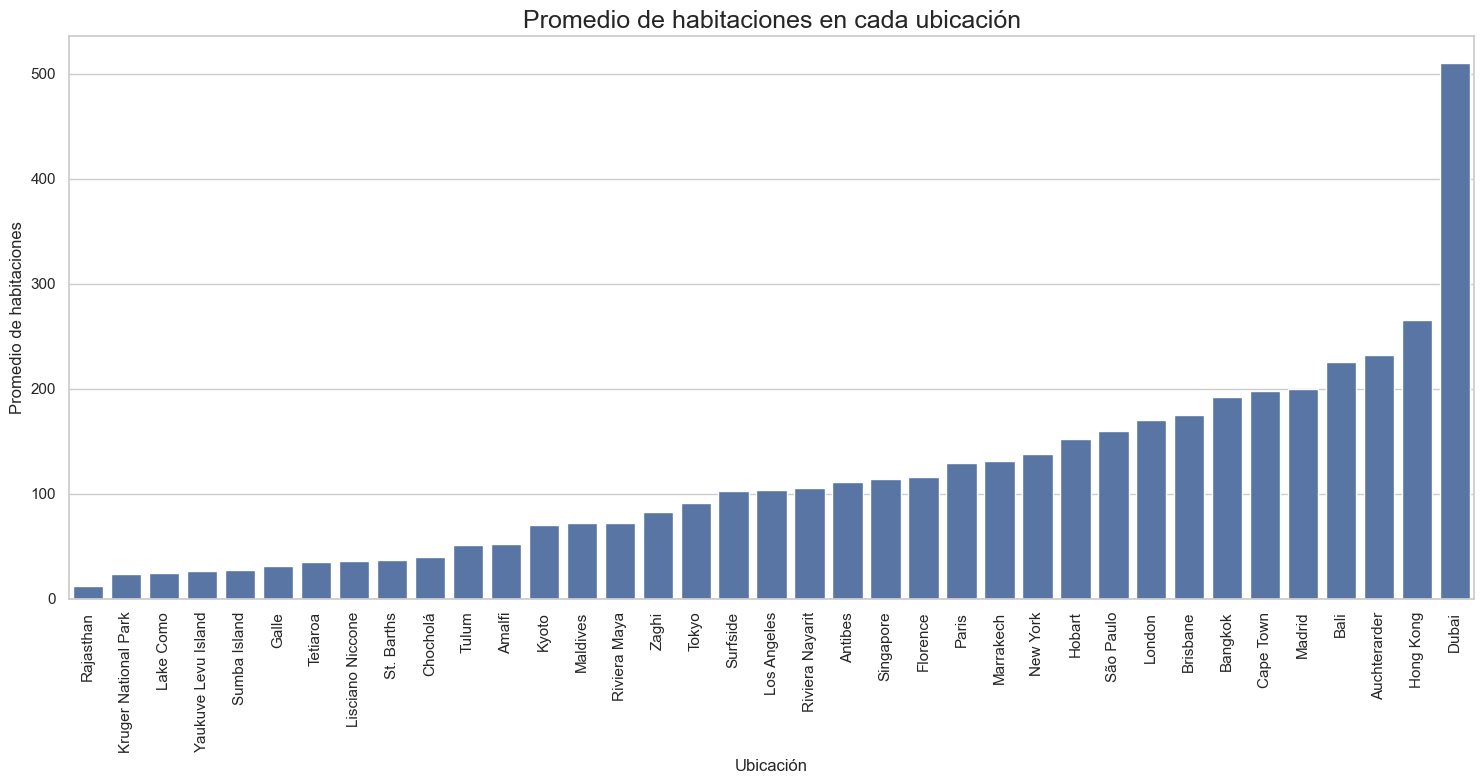

In [9]:
avg_rooms = hotels.groupby('Location')['Total Rooms'].mean().sort_values()

plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.barplot(x=avg_rooms.index, y=avg_rooms.values)

plt.title('Promedio de habitaciones en cada ubicación', fontsize=18)
plt.xlabel('Ubicación')
plt.ylabel('Promedio de habitaciones')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Grafico de los hoteles por país

In [10]:
hotels['Country'] = hotels['Address'].str.split(',').str[-1].str.strip()

country_counts = hotels['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    labels={"Count": "Número de Hoteles"})

fig.update_layout(title="Distribución de Hoteles de Lujo por País")
fig.show()


In [135]:
hotel_count_by_country = hotels['Address'].str.extract(r'([A-Za-z\s]+)$')[0].value_counts().reset_index()
hotel_count_by_country.columns = ['Country', 'Number of Hotels']

print(hotel_count_by_country)


                  Country  Number of Hotels
0                Thailand                 4
1                   Italy                 4
2                  France                 4
3           United States                 4
4                  Mexico                 4
5          United Kingdom                 3
6               Hong Kong                 2
7            South Africa                 2
8    United Arab Emirates                 2
9                   Japan                 2
10              Indonesia                 2
11                Morocco                 2
12              Australia                 2
13               Maldives                 1
14                     BX                 1
15                 Brazil                 1
16                  Spain                 1
17                   lemy                 1
18              Sri Lanka                 1
19                  India                 1
20                   Oman                 1
21       French Polynesia       